In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [123]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, f1_score

In [114]:
from collections import Counter

In [85]:
df = pd.read_csv('fresh_sample.csv')

In [86]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


df.describe()

In [88]:
df.isFraud.value_counts()

0    99884
1      116
Name: isFraud, dtype: int64

Data seems to be imbalaced

<AxesSubplot:xlabel='type', ylabel='count'>

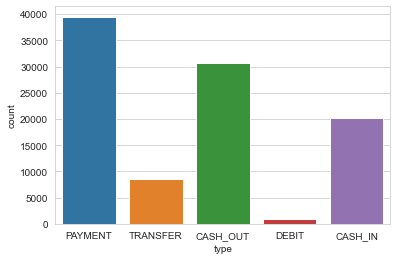

In [89]:
sns.countplot(x=df['type'], data = df[df['isFraud']==1])

In [90]:
len(df[df['isFraud']==1])

116

Here i found that 

In [91]:
#df[df[df['isFraud']==1].groupby('type')['isFraud']|

In [93]:
# isFraud_1 = df[df['isFraud']==1]
# isFraud_0 = df[df['isFraud']==0]

In [96]:
types = pd.get_dummies(df['type'])
types

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
99995,0,0,0,1,0
99996,0,0,0,1,0
99997,1,0,0,0,0
99998,0,1,0,0,0


In [97]:
cat_col = ['nameOrig','nameDest']

In [98]:
le = LabelEncoder()

In [99]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [100]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,11862,170136.0,160296.36,31981,0.0,0.0,0,0
1,1,PAYMENT,1864.28,34345,21249.0,19384.72,33288,0.0,0.0,0,0
2,1,TRANSFER,181.00,15636,181.0,0.00,9303,0.0,0.0,1,0
3,1,CASH_OUT,181.00,91777,181.0,0.00,8273,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,54041,41554.0,29885.86,16681,0.0,0.0,0,0


In [101]:
df.drop('type', axis=1, inplace=True)

In [102]:
final_df = pd.concat([df,types],axis=1)

In [103]:
final_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,11862,170136.0,160296.36,31981,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,34345,21249.0,19384.72,33288,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,15636,181.0,0.00,9303,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,91777,181.0,0.00,8273,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,54041,41554.0,29885.86,16681,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,4020.66,21051,159929.0,155908.34,17200,0.00,0.00,0,0,0,0,0,1,0
99996,10,18345.49,86688,6206.0,0.00,28011,0.00,0.00,0,0,0,0,0,1,0
99997,10,183774.91,2198,39173.0,222947.91,8118,54925.05,0.00,0,0,1,0,0,0,0
99998,10,82237.17,84758,6031.0,0.00,3451,592635.66,799140.46,0,0,0,1,0,0,0


In [104]:
final_df.isna().sum().sort_values(ascending=False)

step              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
CASH_IN           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

In [105]:
final_df.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [106]:
y = final_df['isFraud']
y

0        0
1        0
2        1
3        1
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: isFraud, Length: 100000, dtype: int64

In [108]:
x = final_df.drop('isFraud',axis=1)
x

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,11862,170136.0,160296.36,31981,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,34345,21249.0,19384.72,33288,0.00,0.00,0,0,0,0,1,0
2,1,181.00,15636,181.0,0.00,9303,0.00,0.00,0,0,0,0,0,1
3,1,181.00,91777,181.0,0.00,8273,21182.00,0.00,0,0,1,0,0,0
4,1,11668.14,54041,41554.0,29885.86,16681,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,4020.66,21051,159929.0,155908.34,17200,0.00,0.00,0,0,0,0,1,0
99996,10,18345.49,86688,6206.0,0.00,28011,0.00,0.00,0,0,0,0,1,0
99997,10,183774.91,2198,39173.0,222947.91,8118,54925.05,0.00,0,1,0,0,0,0
99998,10,82237.17,84758,6031.0,0.00,3451,592635.66,799140.46,0,0,1,0,0,0


In [111]:
ros =  RandomOverSampler(random_state=42)

In [113]:
x_ros, y_ros = ros.fit_resample(x,y)

In [115]:
print(Counter(y))

Counter({0: 99884, 1: 116})


In [116]:
print(Counter(y_ros))

Counter({0: 99884, 1: 99884})


In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_ros,y_ros, test_size=0.3, random_state=42)

In [119]:
clf = KNeighborsClassifier()

In [120]:
model = clf.fit(x_test, y_test)

In [121]:
y_pred = model.predict(x_test)

In [124]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[29714,   116],
       [    0, 30101]], dtype=int64)

In [125]:
pr_score = precision_score(y_test,y_pred)
pr_score

0.9961611013667803

In [126]:
re_score = recall_score(y_test,y_pred)
re_score

1.0